In [10]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import pandas as pd
import numpy as np
from osgeo import gdal

import shapely
from glob import glob
import matplotlib.pyplot as plt
directory = '/scratch/6256481/'


import sys
sys.path.insert(0, directory + f'python/py_code/')

from dem import get_raster_vrt
from confinement_margin import confinement_margin
from support import confinement_factor

# from support import create_apex_val_dataframe


%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
vrt_file = directory + "input_created/FAB_dem_vrt.vrt"
demVRT   = gdal.Open(vrt_file)

In [11]:
files = np.sort(glob(directory + 'results/all/*'))
singleFiles= np.sort(glob(directory + 'results/single_values/*.csv'))

In [14]:
df = pd.read_csv(singleFiles[4])

In [15]:
df = confinement_factor(df, 50, 10)

In [30]:
reach = df[df['combined_reach_id'] == df.iloc[200]['combined_reach_id']]

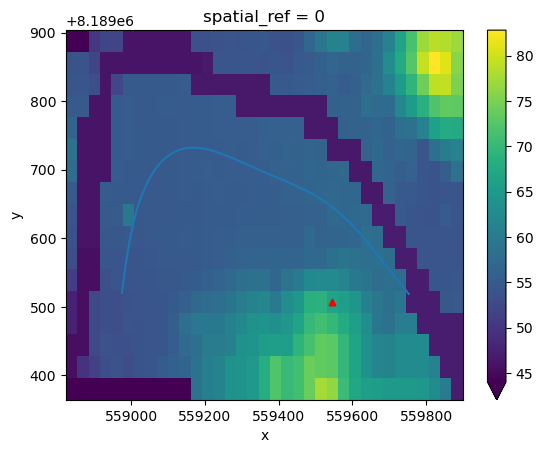

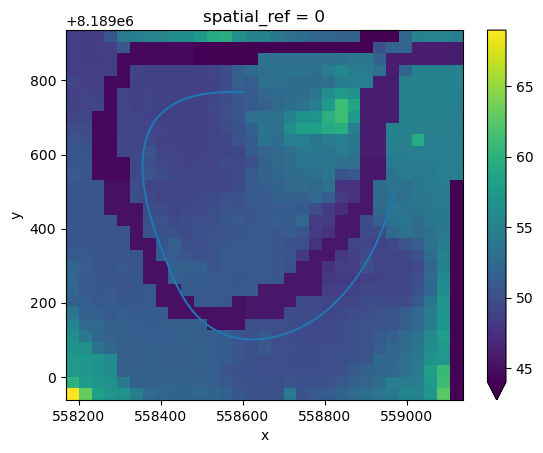

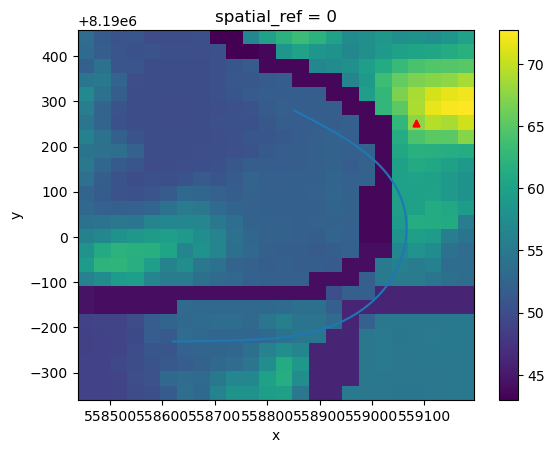

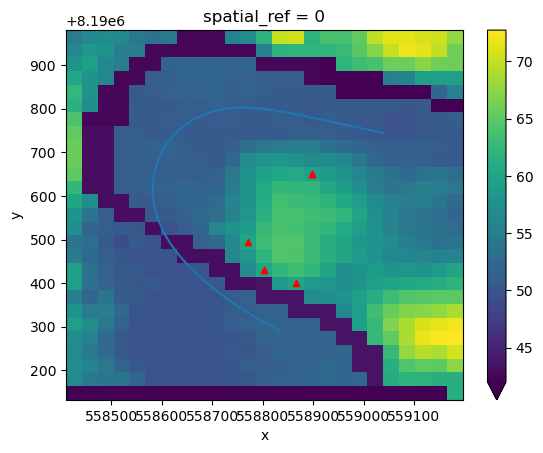

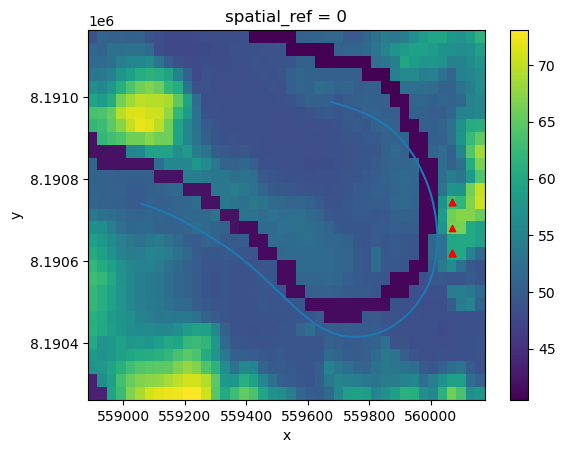

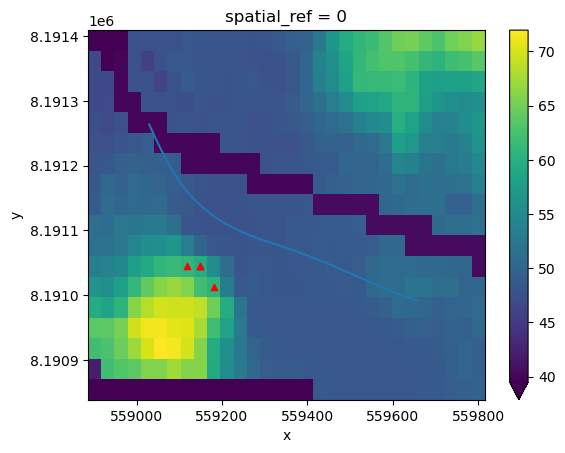

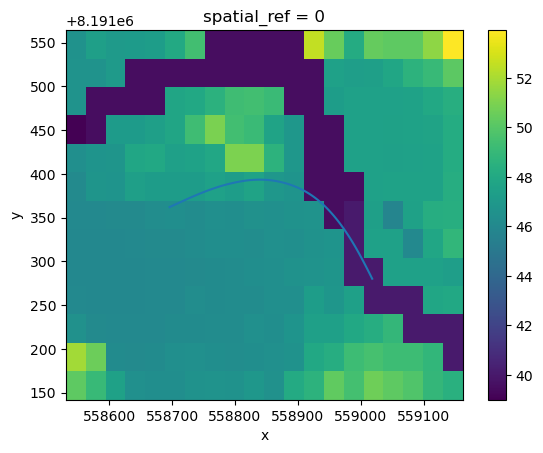

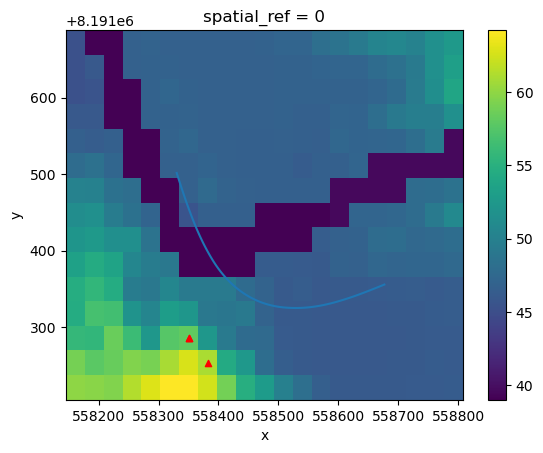

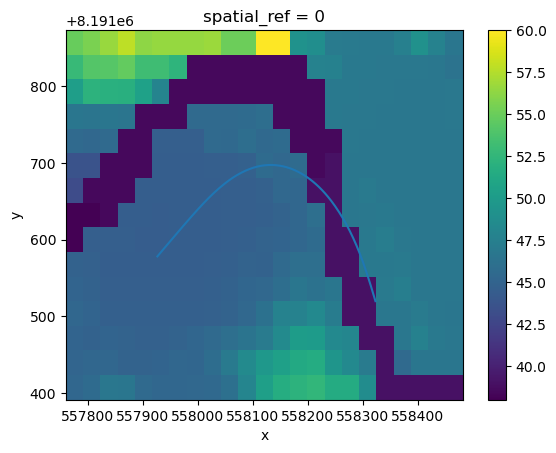

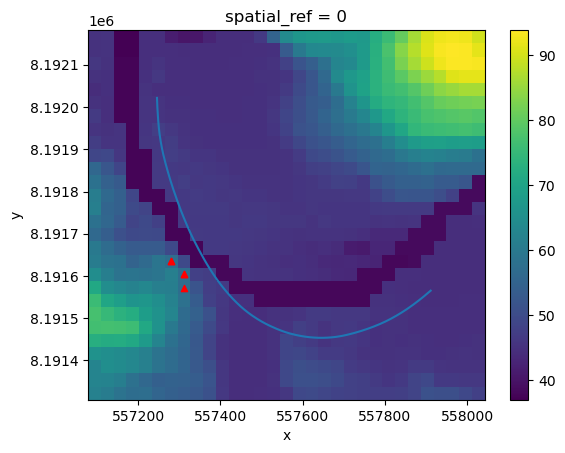

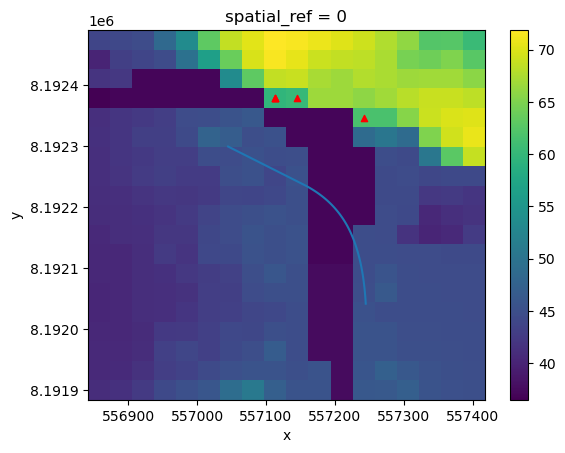

In [31]:
for i,r in reach.iterrows():
    confinement_margin(row = r,vrt = demVRT )